In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",None)
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [3]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.isna().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.drop("customerID",axis=1,inplace=True)

In [9]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df.dropna(subset=["TotalCharges"],inplace=True)

In [10]:
df["Churn"]=df["Churn"].map({"Yes":1,"No":0})

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [13]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.735093
1    0.264907
Name: proportion, dtype: float64

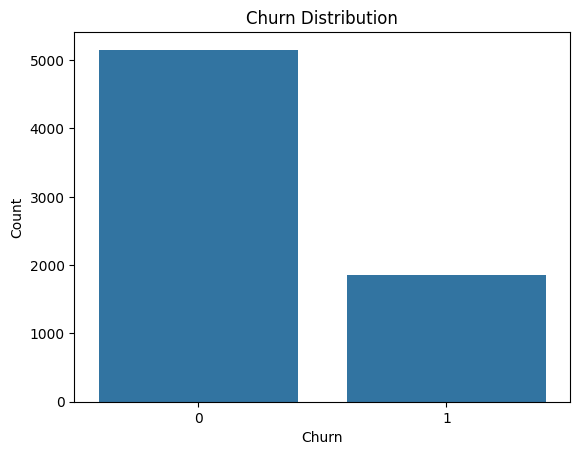

In [14]:
sns.countplot(data=df,x="Churn")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

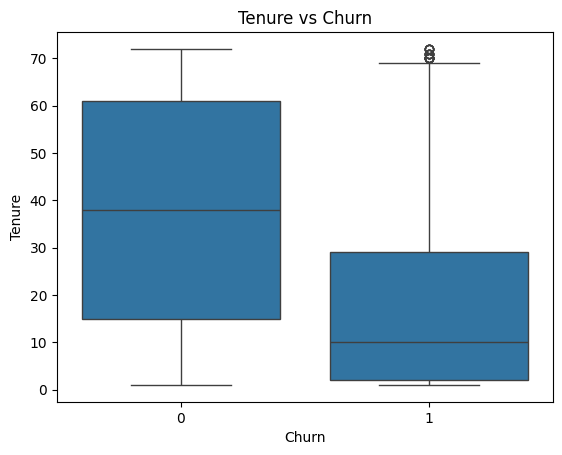

In [15]:
#boxplot: tenure vs churn
sns.boxplot(data=df,x="Churn",y="tenure")
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

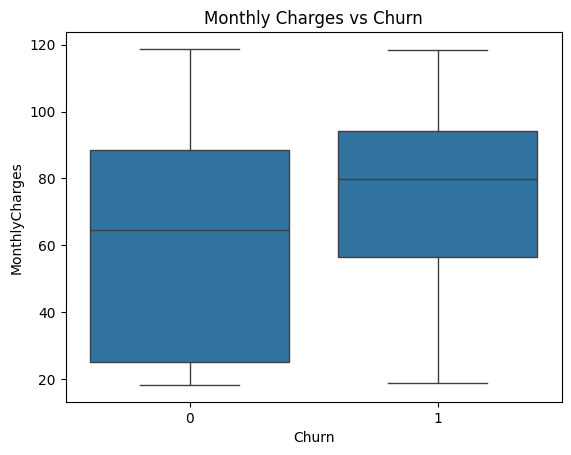

In [16]:
#boxplot: MonthlyCharges vs Churn
sns.boxplot(data=df,x="Churn",y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("MonthlyCharges")
plt.show()

In [17]:
#contact type analysis
contract_stats=df.groupby("Contract")["Churn"].agg(["mean","count"]).sort_values("mean",ascending=False)
print(contract_stats)

                    mean  count
Contract                       
Month-to-month  0.426421   3853
One year        0.112772   1472
Two year        0.028487   1685


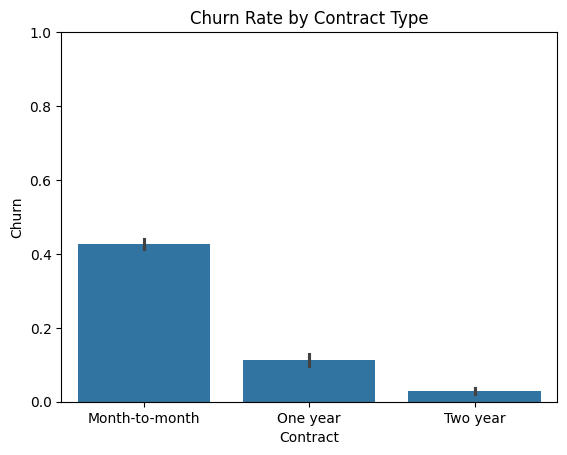

In [18]:
sns.barplot(data=df,x="Contract",y="Churn",estimator="mean")
plt.ylim(0,1)
plt.title("Churn Rate by Contract Type")
plt.show()

In [19]:
#internet service analysis
internet_stats=df.groupby("InternetService")["Churn"].agg(["mean","count"]).sort_values("mean",ascending=False)
print(internet_stats)

                     mean  count
InternetService                 
Fiber optic      0.417799   3090
DSL              0.189312   2414
No               0.072377   1506


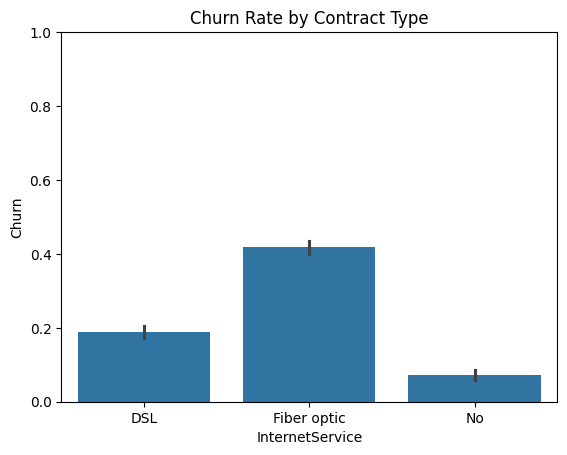

In [20]:
sns.barplot(data=df,x="InternetService",y="Churn",estimator="mean")
plt.ylim(0,1)
plt.title("Churn Rate by Contract Type")
plt.show()

In [21]:
#payment method analysis
payment_stats=df.groupby("PaymentMethod")["Churn"].agg(["mean","count"]).sort_values("mean",ascending=False)
print(payment_stats)

                               mean  count
PaymentMethod                             
Electronic check           0.451462   2359
Mailed check               0.190176   1588
Bank transfer (automatic)  0.167315   1542
Credit card (automatic)    0.152531   1521


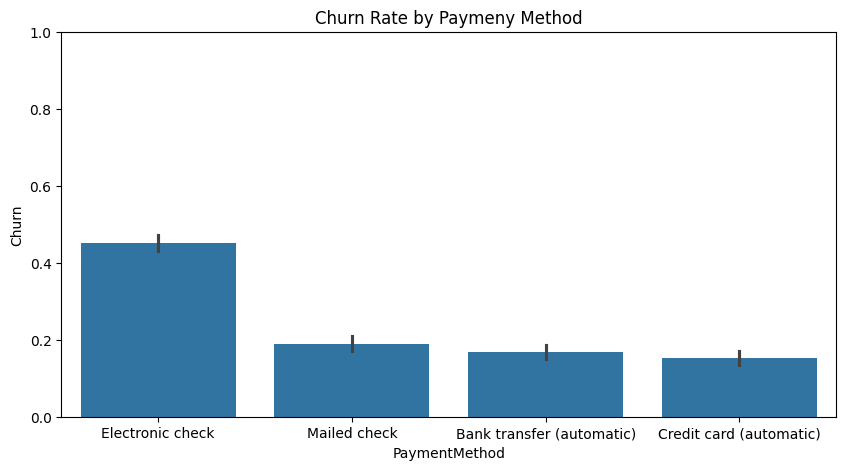

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="PaymentMethod",y="Churn",estimator="mean")
plt.ylim(0,1)
plt.title("Churn Rate by Paymeny Method")
plt.show()

In [23]:
#senior citizen analysis
senior_stats=df.groupby("SeniorCitizen")["Churn"].agg(["mean","count"]).sort_values("mean",ascending=False)
print(senior_stats)

                   mean  count
SeniorCitizen                 
1              0.416301   1141
0              0.235475   5869


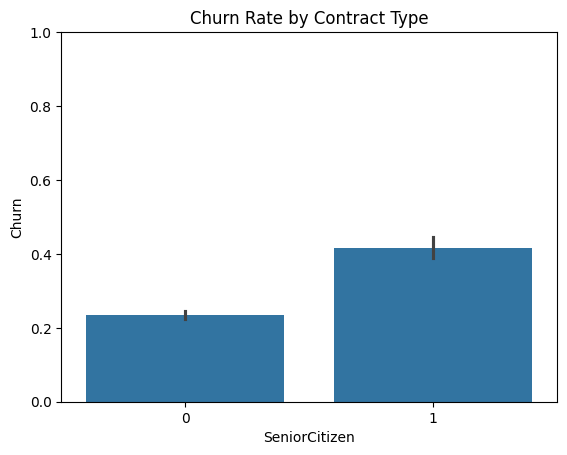

In [24]:
sns.barplot(data=df,x="SeniorCitizen",y="Churn",estimator="mean")
plt.ylim(0,1)
plt.title("Churn Rate by Contract Type")
plt.show()

In [25]:
#barplot: tenure_bin vs Churn
df["tenure_bin"]=pd.cut(
    df["tenure"],
    bins=[0,12,24,36,48,60,72],
    labels=["0-12","12-24","24-36","36-48","48-60","60-72"]
    )
tenure_bin_stats=df.groupby("tenure_bin")["Churn"].agg(["mean","count"])
print(tenure_bin_stats)

                mean  count
tenure_bin                 
0-12        0.476080   2153
12-24       0.287109   1024
24-36       0.216346    832
36-48       0.190289    762
48-60       0.144231    832
60-72       0.066098   1407


C:\Users\jk11b\AppData\Local\Temp\ipykernel_5488\4291501734.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_bin_stats=df.groupby("tenure_bin")["Churn"].agg(["mean","count"])


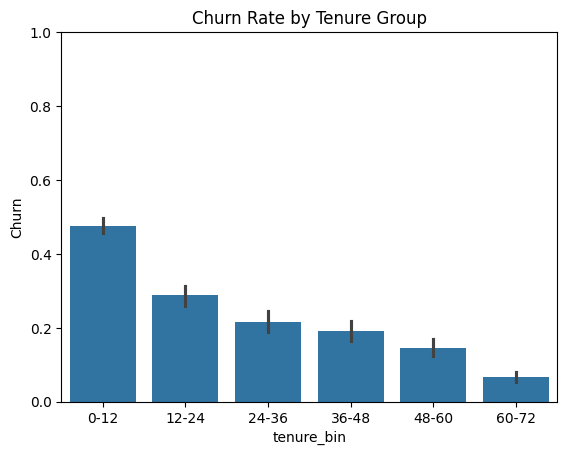

In [26]:
sns.barplot(data=df,x="tenure_bin",y="Churn",estimator="mean")
plt.ylim(0,1)
plt.title("Churn Rate by Tenure Group")
plt.show()

In [27]:
services_cols=["PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
df["num_services"]=(df[services_cols]=="Yes").sum(axis=1)
services_stats=df.groupby("num_services")["Churn"].agg(["mean","count"])
print(services_stats)

                  mean  count
num_services                 
0             0.437500     80
1             0.207164   1675
2             0.328836   1186
3             0.364767    965
4             0.313789    921
5             0.256071    906
6             0.225519    674
7             0.124051    395
8             0.052885    208


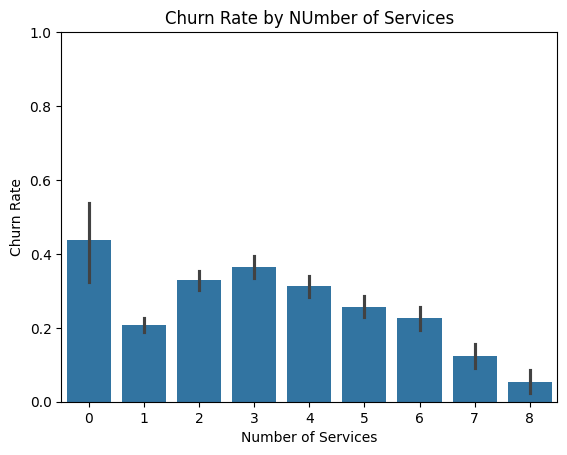

In [28]:
sns.barplot(data=df,x="num_services",y="Churn",estimator="mean")
plt.ylim(0,1)
plt.title("Churn Rate by NUmber of Services")
plt.xlabel("Number of Services")
plt.ylabel("Churn Rate")
plt.show()

In [29]:
#multivariate insight
pivot_contract_internet=pd.pivot_table(
    df,
    values="Churn",
    index="Contract",
    columns="InternetService",
    aggfunc=["mean","count"]
)
print(pivot_contract_internet)

                     mean                       count                 
InternetService       DSL Fiber optic        No   DSL Fiber optic   No
Contract                                                              
Month-to-month   0.321048    0.544769  0.186275  1221        2122  510
One year         0.092982    0.192950  0.024793   570         539  363
Two year         0.019262    0.072261  0.007899   623         429  633


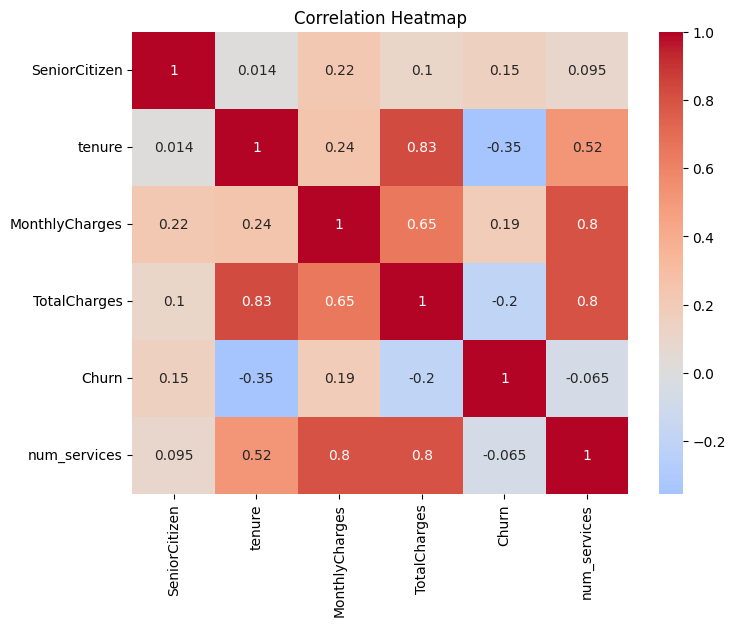

In [30]:
corr=df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7010 non-null   object  
 1   SeniorCitizen     7010 non-null   int64   
 2   Partner           7010 non-null   object  
 3   Dependents        7010 non-null   object  
 4   tenure            7010 non-null   int64   
 5   PhoneService      7010 non-null   object  
 6   MultipleLines     7010 non-null   object  
 7   InternetService   7010 non-null   object  
 8   OnlineSecurity    7010 non-null   object  
 9   OnlineBackup      7010 non-null   object  
 10  DeviceProtection  7010 non-null   object  
 11  TechSupport       7010 non-null   object  
 12  StreamingTV       7010 non-null   object  
 13  StreamingMovies   7010 non-null   object  
 14  Contract          7010 non-null   object  
 15  PaperlessBilling  7010 non-null   object  
 16  PaymentMethod     7010 non-nu

In [32]:
binary_cols=["Partner","Dependents","PhoneService","PaperlessBilling"]
for col in binary_cols:
    df[col]=df[col].map({"Yes":True,"No":False})

In [33]:
df["gender"].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [34]:
df.to_csv("cleaned_churn.csv",index=False)